# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(mouse_results['Mouse ID'].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_mice = mouse_results.groupby(['Mouse ID','Timepoint']).count()
duplicates = grouped_mice.loc[(grouped_mice['Drug Regimen'] > 1),:]
duplicates

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_mouse = mouse_results.loc[mouse_results['Mouse ID'] == 'g989']
dupl_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
idx_to_drop = dupl_mouse.index
mouse_results_clean = mouse_results.drop(index=idx_to_drop)
mouse_results_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_results_clean['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_tumor_volume = mouse_results_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame({
    "Mean Tumor Volume": drug_tumor_volume.mean(),
    "Median Tumor Volume": drug_tumor_volume.median(),
    "Tumor Volume Variance": drug_tumor_volume.var(),
    "Tumor Volume Std. Dev.": drug_tumor_volume.std(),
    "Tumor Volume Std. Err.": drug_tumor_volume.sem()
})
tumor_volume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_results_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

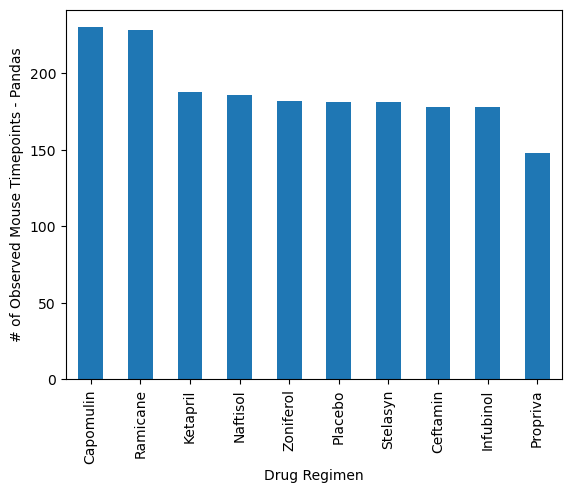

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs_df = mouse_results_clean.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
drugs_df.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints - Pandas')
plt.show()


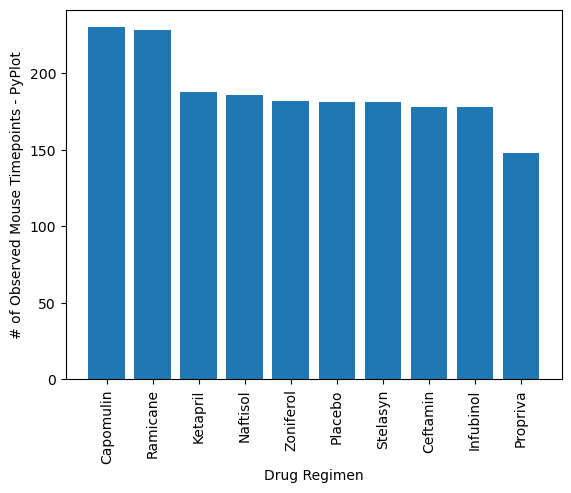

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_group = drugs_df.reset_index()

drug_counts = [val for val in drug_group['Mouse ID']]
x_axis = np.arange(len(drug_counts))
tick_locations = [val for val in drug_group['Drug Regimen']]

plt.bar(x_axis, drug_counts,align='center')
plt.xlabel('Drug Regimen')
plt.xticks(x_axis, tick_locations,rotation=90)
plt.ylabel('# of Observed Mouse Timepoints - PyPlot')
plt.show()

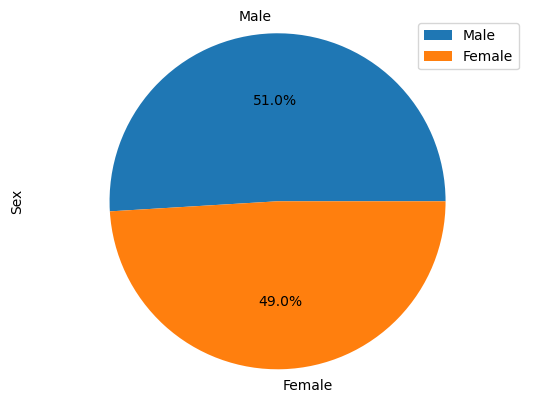

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = mouse_results_clean[['Sex', 'Mouse ID']].groupby('Sex').count().sort_index(ascending=False)
pie_plot = pie_df.plot(kind='pie',y='Mouse ID',ylabel='Sex',autopct='%1.1f%%')
plt.axis("equal")
plt.show()

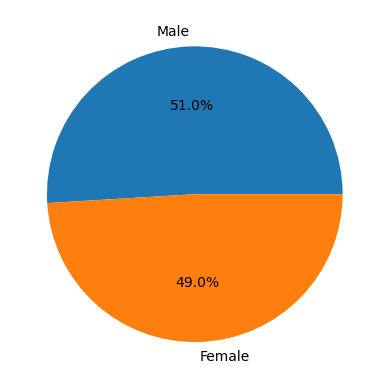

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
new_df = pie_df.reset_index()
labels = [x for x in new_df['Sex']]
counts = [x for x in new_df['Mouse ID']]
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_mouse_results = mouse_results_clean[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = final_mouse_results.sort_values(['Mouse ID', 'Timepoint']).groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume_df = pd.merge(final_mouse_results, final_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
final_volume_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
243,z435,Propriva,10,48.710661
244,z578,Ramicane,45,30.638696
245,z581,Infubinol,45,62.754451
246,z795,Naftisol,45,65.741070


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = final_volume_df.loc[(final_volume_df['Drug Regimen'] == t),'Tumor Volume (mm3)']
    tumor_volumes.append(tumor_vols)
    
    # add subset
    quartiles = tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

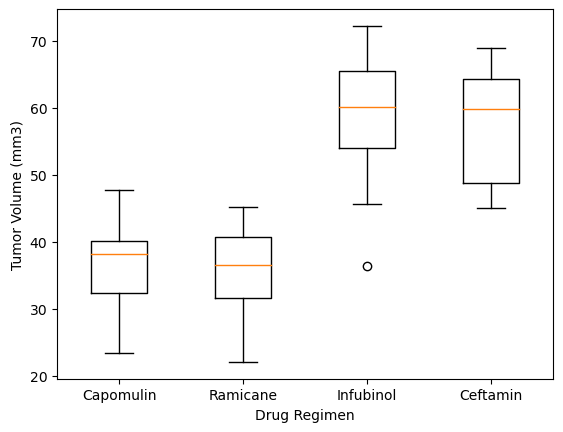

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=treatments, )
plt.xlabel('Drug Regimen')
plt.ylabel("Tumor Volume (mm3)")


#plt.xticks(x_axis, tick_locations)
plt.show()


## Line and Scatter Plots

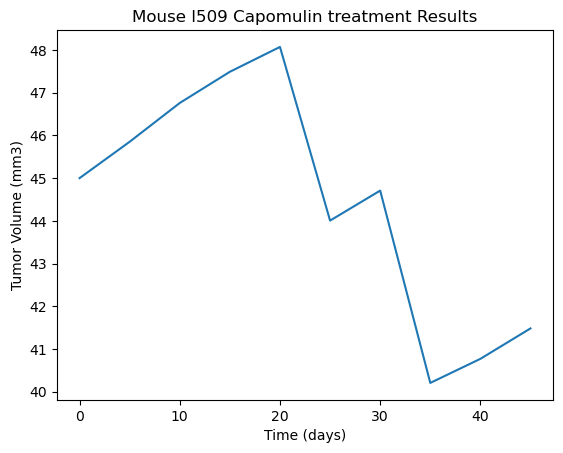

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
treatment = 'Capomulin' 

mouse_plot = mouse_results_clean.loc[(mouse_results_clean['Mouse ID'] == mouse_id) & (mouse_results_clean['Drug Regimen'] == treatment), ['Timepoint', 'Tumor Volume (mm3)']]
plt.plot( mouse_plot['Timepoint'], mouse_plot['Tumor Volume (mm3)'])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.title(f"Mouse {mouse_id} {treatment} treatment Results")
plt.show()

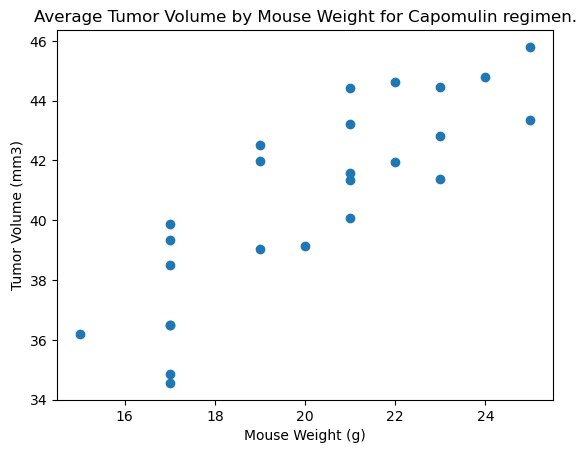

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
treatment_mice = mouse_results_clean.loc[mouse_results_clean['Drug Regimen'] == treatment]
tumor_volume_by_weight = treatment_mice.groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean()

plt.scatter(tumor_volume_by_weight['Weight (g)'], tumor_volume_by_weight['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Average Tumor Volume by Mouse Weight for {treatment} regimen.")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


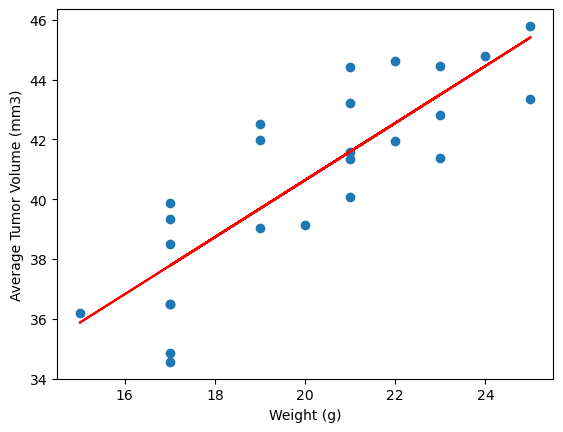

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_volume_by_weight['Weight (g)'], tumor_volume_by_weight['Tumor Volume (mm3)'])